### Student Information
Name:蔡洵晟

Student ID:109065466

GitHub ID:veblen-cai

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# 2

In [22]:
from data_mining_helpers import *
from text_analysis import *
import pandas as pd
import numpy as np
from collections import Counter

In [15]:
df=pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt',header=None)
df.columns=['sentence','lable']

d:\developer\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

read_table is deprecated, use read_csv instead, passing sep='\t'.



In [16]:
df.head(10)

,sentence,lable
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [17]:
tokenize_list=[]
for i in df.sentence.values:
    tokenize_list.append(tokenize_text(i))

In [18]:
get_tokens_and_frequency(tokenize_list[0])

(odict_keys(['in', 'So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'here', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.']),
 odict_values([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [20]:
words_list=[]
for line in tokenize_list:
    words_list+=line


In [36]:
words_freq=dict(Counter(words_list))
words_freq=dict(sorted(words_freq.items(),key=lambda x:x[1],reverse=True))

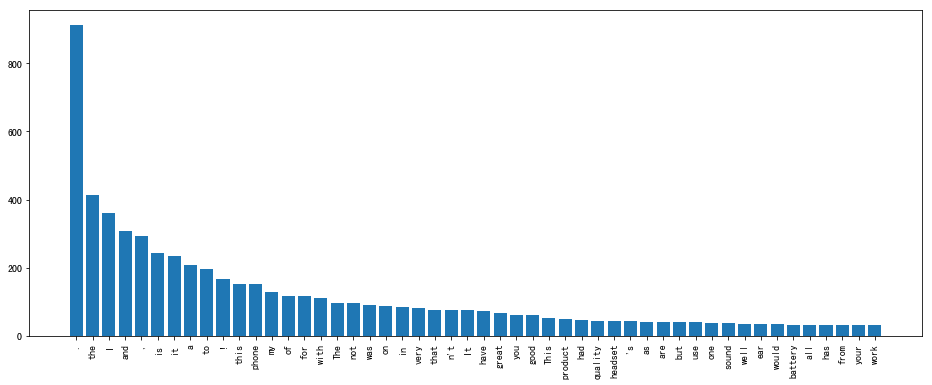

In [41]:
plt.figure(figsize=(16,6))
plt.bar(list(words_freq.keys())[:50],list(words_freq.values())[:50])
plt.xticks(rotation=90)
plt.show()

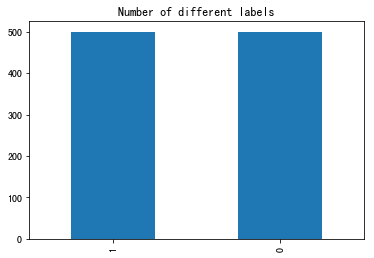

In [47]:
df.lable.value_counts().plot.bar(title='Number of different labels')

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.sentence)

In [51]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

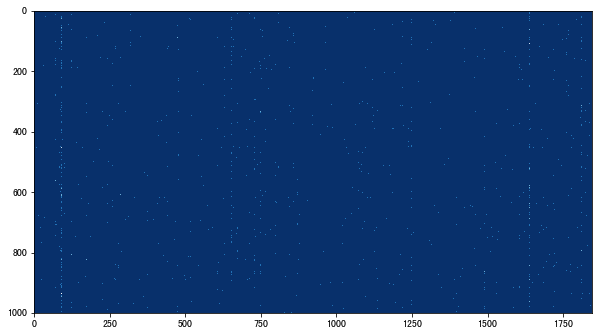

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(X_counts.toarray(),cmap='Blues_r')

In [60]:
analyze = count_vect.build_analyzer()

In [61]:
analyze("Hello World!")

['hello', 'world']

In [62]:
count_vect.get_feature_names()[0:10]

['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000']

In [73]:
X_counts.shape

(1000, 1847)

In [79]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
count_vect.transform(['10 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
from sklearn.decomposition import PCA

In [89]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

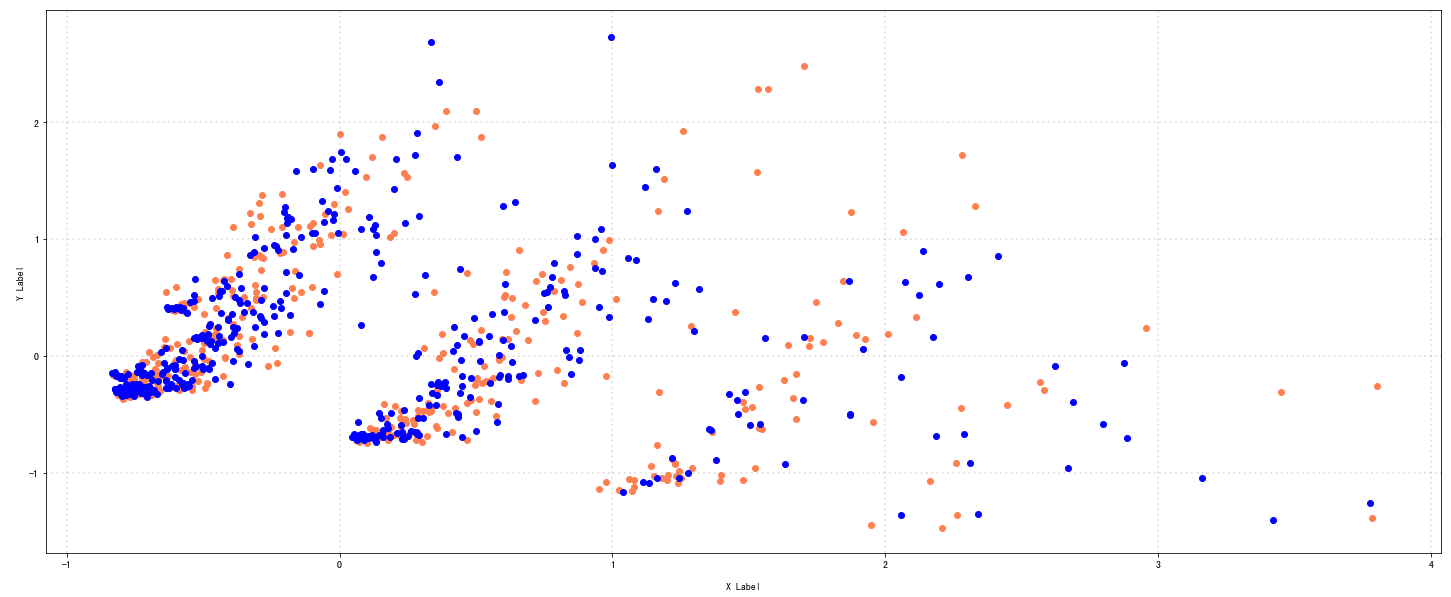

In [90]:
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0,1]):
    xs = X_reduced[df.lable == category].T[0]
    ys = X_reduced[df.lable== category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [91]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [93]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.lable)
df['bin_label']=mlb.transform(df.lable).tolist()

In [94]:
df

,sentence,lable,bin_label
0,So there is no way for me to plug it in here i...,0,[0]
1,"Good case, Excellent value.",1,[1]
2,Great for the jawbone.,1,[1]
3,Tied to charger for conversations lasting more...,0,[0]
4,The mic is great.,1,[1]
5,I have to jiggle the plug to get it to line up...,0,[0]
6,If you have several dozen or several hundred c...,0,[0]
7,If you are Razr owner...you must have this!,1,[1]
8,"Needless to say, I wasted my money.",0,[0]
9,What a waste of money and time!.,0,[0]


# 3

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [4]:
df=pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt',header=None)
df.columns=['sentence','lable']


d:\developer\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,sentence,lable
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
df.shape

(1000, 2)

In [7]:
vectorizer=CountVectorizer()

x=vectorizer.fit_transform(df.sentence).toarray()

In [8]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(x).toarray()


In [10]:
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_num=800

Use word frequency to train Naive Bayes

In [12]:
word_freq_nb=GaussianNB()
word_freq_nb.fit(x[:train_num],df.lable.iloc[:train_num])
word_freq_pred=word_freq_nb.predict(x[train_num:])
f1_score(df.lable.iloc[train_num:],word_freq_pred)

0.6829268292682926

Use TF-IDF to train Naive Bayes

In [15]:

tfidf_nb=GaussianNB()
tfidf_nb.fit(tfidf[:train_num],df.lable.iloc[:train_num])
tfidf_pred=tfidf_nb.predict(tfidf[train_num:])
f1_score(df.lable.iloc[train_num:],tfidf_pred)

0.6633165829145728

It can be seen that the performance of the naive Bayes model trained using word frequency is better than the model using TF-IDF

# 4

- text does not remove stop words, meaningless stop words will adversely affect the results